In [1]:
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
%matplotlib notebook

In [2]:
# Read data from .csv file
data = np.genfromtxt('./data/data_852.356_without_filter.csv', delimiter=',')

<IPython.core.display.Javascript object>


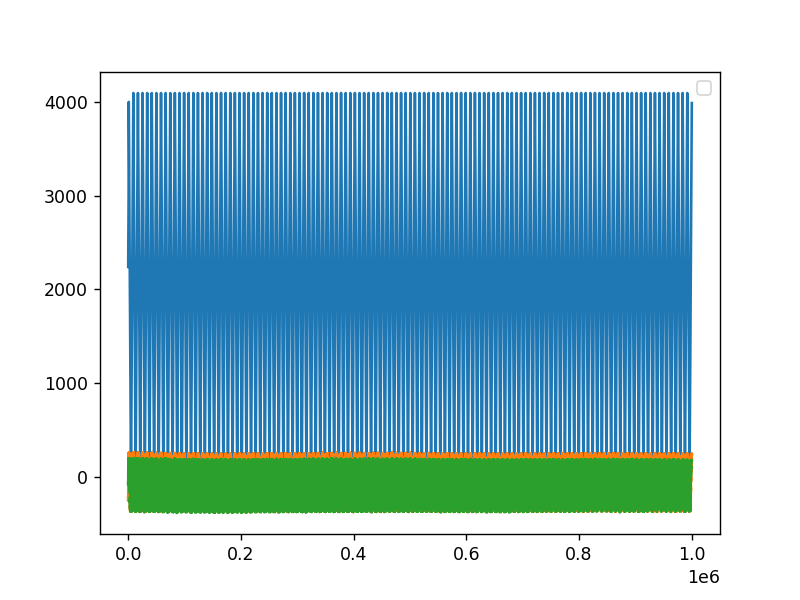

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [3]:
# Visulaize data

# 0th column -> ramp
# 1st column -> pd1
# 2nd column -> pd2

plt.close()
plt.plot(data[:,0])
plt.plot((data[:,1]-np.mean(data[:,1])))
plt.plot((data[:,2]-np.mean(data[:,2])))
plt.legend()
plt.show()

In [4]:
print(f'min: {np.min(data)}\nmax: {np.max(data)}')

min: 0.0
max: 4095.0


In [5]:
# Normalization

def NormalizeData(data, min_v, max_v):
    return (data/1024.0)
    return (data - min_v) / (max_v - min_v)

In [6]:
# Wavelevet denoising

pd1 = data[:, 1]
pd2 = data[:, 2]

pd1_f = denoise_wavelet(pd1, wavelet='db8', wavelet_levels=6, method='VisuShrink', mode='soft', sigma=estimate_sigma(pd1, average_sigmas=True)*4, rescale_sigma=True)
pd2_f = denoise_wavelet(pd2, wavelet='db8', wavelet_levels=6, method='VisuShrink', mode='soft', sigma=estimate_sigma(pd2, average_sigmas=True)*4, rescale_sigma=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11560\1892736704.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


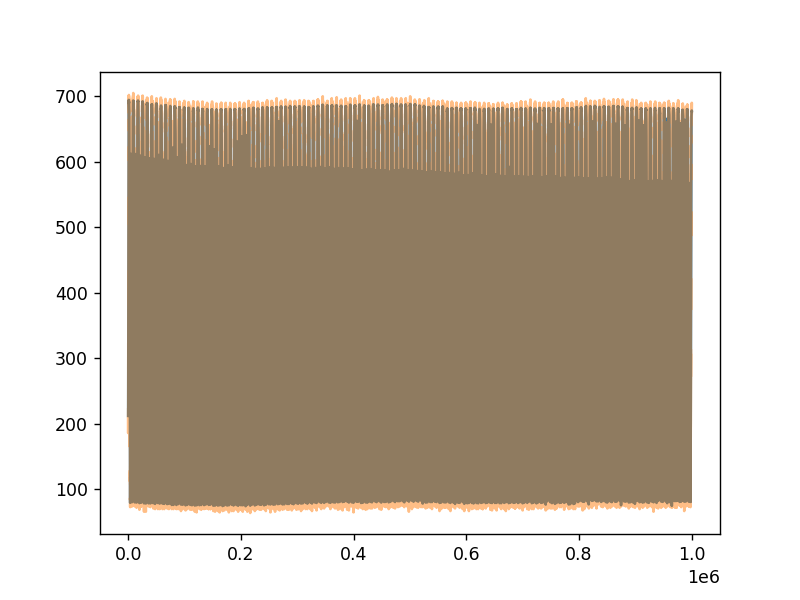

In [7]:
plt.close()
plt.plot(pd1_f, alpha = 1)
plt.plot(pd1, alpha = 0.5)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11560\3272261046.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


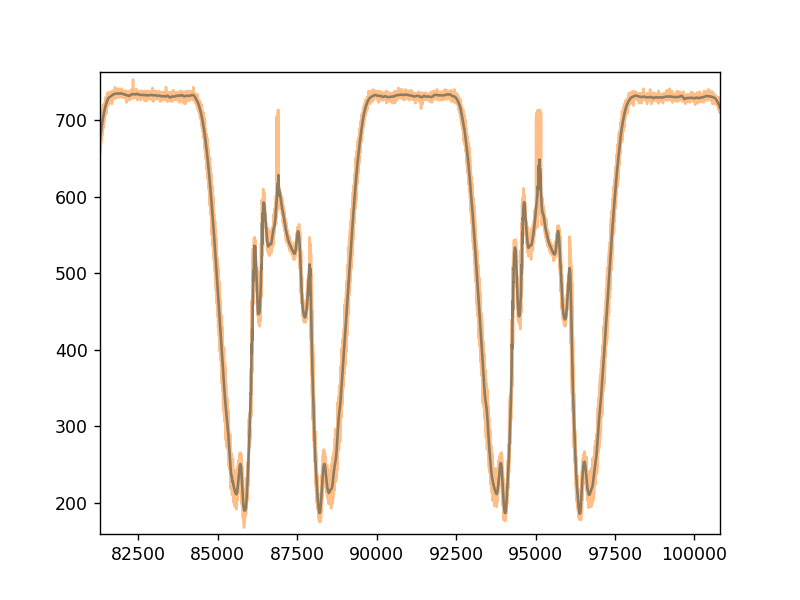

In [8]:
plt.close()
plt.plot(pd2_f, alpha = 1)
plt.plot(pd2, alpha = 0.5)
plt.show()

In [9]:
pd1_f = NormalizeData(pd1_f, 0, 1023)
pd2_f = NormalizeData(pd2_f, 0, 1023)

In [10]:
# We will seperate the data of each ramp slope

# get out the indices of minimum and maximum position in ramp value
min_index = np.where(data[:,0] == np.min(data[:,0]))
max_index = np.where(data[:,0] == np.max(data[:,0]))

print(f'min_index length: {np.shape(min_index)[1]}\nmax_index length: {np.shape(max_index)[1]} \n')
print(f'Min_indices: {min_index},\nMax_indices:{max_index}')

min_index length: 122
max_index length: 121 

Min_indices: (array([  5019,  13209,  21399,  29589,  37779,  45969,  54159,  62349,
        70539,  78729,  86919,  95109, 103299, 111489, 119679, 127869,
       136059, 144249, 152439, 160629, 168819, 177009, 185199, 193389,
       201579, 209769, 217959, 226149, 234339, 242529, 250719, 258909,
       267099, 275289, 283479, 291669, 299859, 308049, 316239, 324429,
       332619, 340809, 348999, 357189, 365379, 373569, 381759, 389949,
       398139, 406329, 414519, 422709, 430899, 439089, 447279, 455469,
       463659, 471849, 480039, 488229, 496419, 504609, 512799, 520989,
       529179, 537369, 545559, 553749, 561939, 570129, 578319, 586509,
       594699, 602889, 611079, 619269, 627459, 635649, 643839, 652029,
       660219, 668409, 676599, 684789, 692979, 701169, 709359, 717549,
       725739, 733929, 742119, 750309, 758499, 766689, 774879, 783069,
       791259, 799449, 807639, 815829, 824019, 832209, 840399, 848589,
       856779, 86

In [11]:
data = None

In [12]:
# X is feature matrix X = {x_1^T, x_2^T, ...... , x_n^T}, where x_1 contains pd1 - pd2 value

pd1_0 = pd1_f[min_index[0][0]:max_index[0][0]]
pd2_0 = pd2_f[min_index[0][0]:max_index[0][0]]
pd_diff = pd1_0 - pd2_0

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11560\1733984199.py:2: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


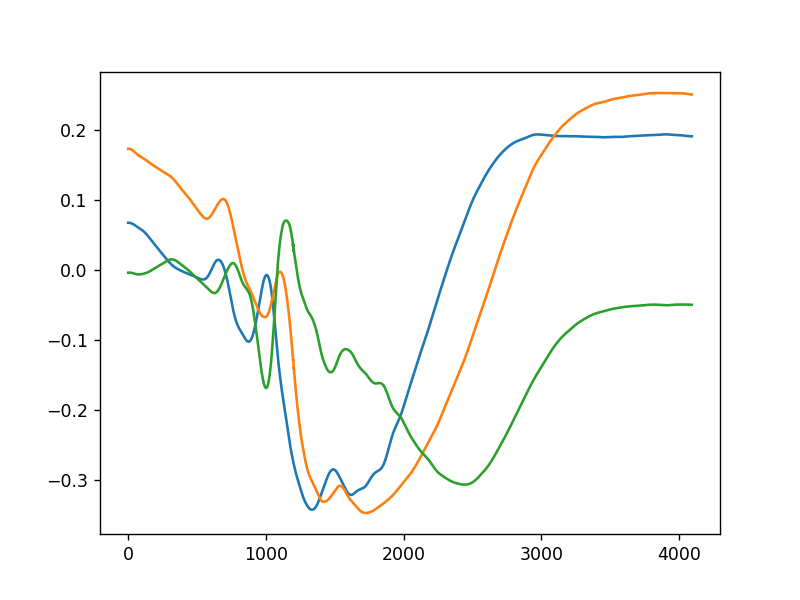

In [13]:
# Visulaize once
plt.close()
plt.plot(pd2_0 - np.mean(pd2_0))
plt.plot(pd1_0 - np.mean(pd1_0))
plt.plot(pd_diff)
plt.show()

In [16]:
X = np.reshape(np.arange(0,4095), (1, len(pd_diff)))

for i in range(0, np.shape(max_index)[1]-1):
    pd1_0 = pd1_f[min_index[0][i]:max_index[0][i]]
    pd2_0 = pd2_f[min_index[0][i]:max_index[0][i]]
    pd_diff = pd1_0 - pd2_0 - (np.mean(pd1_0) - np.mean(pd2_0))
    X = np.vstack((X, np.reshape(np.asarray(pd_diff), (1, len(pd_diff)) ) ))

In [17]:
X.shape

(121, 4095)

In [18]:
np.savetxt("./data/X_wavelet_852.356.csv", X, delimiter=",")